# Random walk

:::{admonition} What you need to know

- Summing independent random variables creates another random variable that could be used to compute means and variances in the sample.
- The Law of Large Numbers is a principle that states that as the number of observations increases, the average of the results will get closer to the expected value, meaning that more data leads to more accurate outcomes.
- The Central Limit Theorem (CLT) tells us that if you take a lot of samples from any kind of population and look at the average of those samples, those averages will tend to form a normal distribution, even if the original population is not shaped that way.
- In chemistry and physics, a random walk model describes the erratic, unpredictable motion of atoms and molecules, providing a fundamental model for diffusion processes, molecular motion in fluids, and the propagation of light in disordered media.
- Learn to simulate random walk and diffusive processes using python
:::

In [4]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt

### Sum of Random Variables

- Consider a sequence of **independent and identically distributed (i.i.d.)** random variables, $X_1, X_2, \ldots$. Examples include coin tosses, the random displacement of a molecule, or the random placement of a molecule in the left vs. right corner of a box. Being identically distributed means each term has a well-defined **mean** $\mu$ and **variance** $\sigma^2$: 

- The sum of $n$ random variables, denoted by $S_n$, is called a **sample sum**, and average of sum is called a **sample mean**.  Our goal is to understand how these summed or aggregated quantities behave as a function of sample size.

$$S_n = \sum_{i=1}^n X_i\,\,\,\,\,\,\,\, M_n = \frac{1}{n}\sum_{i=1}^n X_i$$

- Expectation is always a linear operator. Variance in general is not. But for  **i.i.d.** random variables, variance becomes linear operator. To show this we denote mean subtracted random variable as $Y_i = X_i - \mu$ which  has zero expectation $E[Y_i] = 0$ Because of the independence of random variables all cross-terms are zero $E[Y_i Y_j] = 0$ for $i \neq j$ and all self-terms $i=j$ are equal to variance $E[Y^2_i] = V[X_1]=\sigma^2$

$$E(S_n) = \sum_{i=1}^n E(X_i) = n\mu$$

$$V(S_n) = E[(S_n - E[S_n])^2] =  E\Big[\Big(\sum^{i=n}_{i=1} Y_i\Big)^2\Big]=\sum_i \sum_j E[Y_i Y_j] = \sum_i E[Y^2_i] = n\sigma^2$$


### Law of Large Numbers (LLN)

- Both mean and variance of sum of random variables grows linearly with $n$: 

$$E[S_n] = n\mu$$

$$V[S_n]= n\sigma^2$$

- This has consequence on how we estimate means from samples $M_n = \frac{1}{n} S_n$. 
- Sample mean becomes increasingly more accurate with the error or standard deviation decaying with $1/2$ exponent.

$$E[M_n]=E\left[\frac{S_n}{n}\right] = \frac{1}{n}\sum_{i=1}^n E[X_i] = \mu$$

$$V[M_n] = V\left[\frac{S_n}{n}\right] = \frac{1}{n^2}V[S_n] = \frac{\sigma^2}{n}$$

### Simulate tests of LLN

In [85]:
for N in [10, 100, 1000, 10000]:
    
    M = np.random.randint(1, 10, N)/N 
    print(M.var()) #sample variance decays

0.0404
0.00051
7.1458039999999995e-06
6.7033e-08


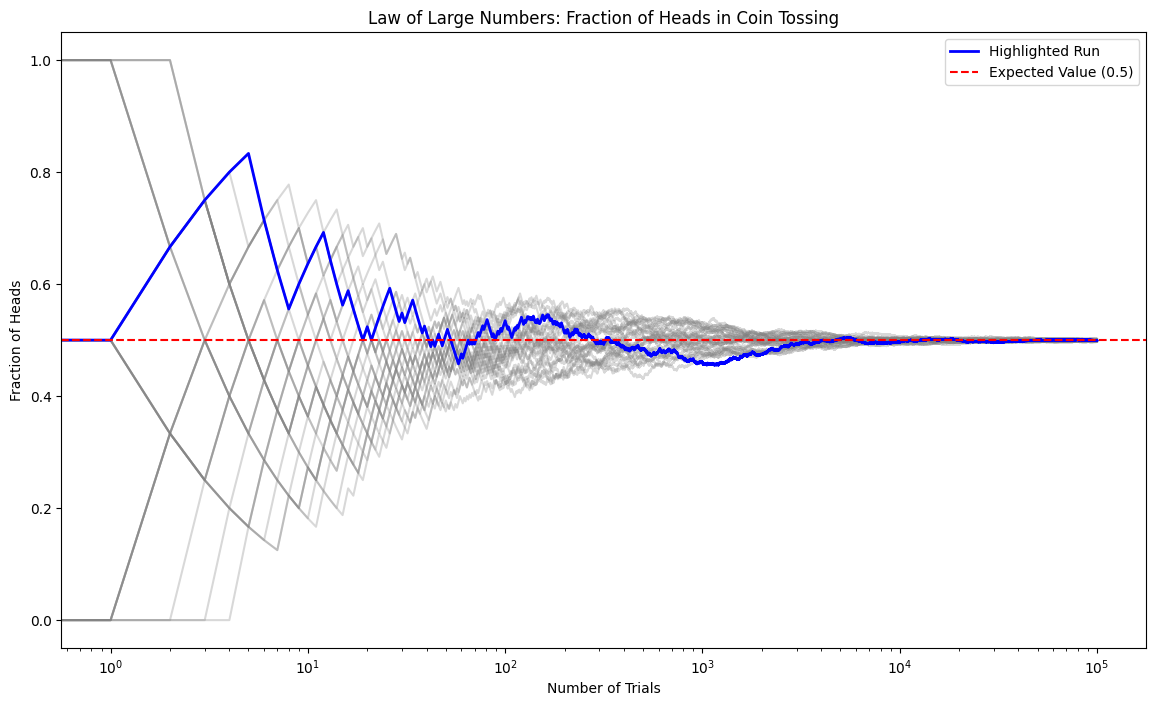

In [40]:
# Number of trials and runs
N, runs = int(1e5), 30

# Store fractions of heads for each trial in each run
fractions = np.zeros((runs, N))

# Simulate coin tosses
for run in range(runs):
    # Generate coin tosses (0 for tails, 1 for heads)
    tosses = np.random.randint(2, size=N)
    # Calculate cumulative sum to get the number of heads up to each trial
    cum_heads = np.cumsum(tosses)
    # Calculate fraction of heads up to each trial
    fractions[run, :] = cum_heads / np.arange(1, N+1)

# Plotting
plt.figure(figsize=(14, 8))

# Plot all runs with low opacity
for run in range(runs):
    plt.plot(fractions[run, :], color='grey', alpha=0.3)

# Highlight first run
plt.semilogx(fractions[0, :], color='blue', linewidth=2, label='Highlighted Run')

# Expected value line
plt.axhline(y=0.5, color='red', linestyle='--', label='Expected Value (0.5)')
plt.xlabel('Number of Trials')
plt.ylabel('Fraction of Heads')
plt.title('Law of Large Numbers: Fraction of Heads in Coin Tossing')
plt.legend()

### The Central Limit Theorem  (CLT)

- **Central Limit Theorem** asserts that the probability distribution function or **PDF** of sum of random variables becomes gaussian distribution with mean $n\mu$ and $n\sigma^2$. Note that CLT is based on assumption that the **mean and variance**, $\mu$ and $\sigma^2$, **are finite!**. Thus, CLT does not hold for certain power-law distributed RVs.

$$S_n = X_1 +X_2+...+X_n \rightarrow N(n\mu, n\sigma^2)$$

$$p(s) = \frac{1}{(2\pi  n\sigma^2)^{1/2}}e^{-\frac{(s-n\mu)^2}{2 n\sigma^2}}$$

- If we subtract mean and scale the sample sum by its standard deviation we will get a standard normal distribution $. 

$$Z_n = \frac{S_n - n\mu}{\sqrt{n}\sigma} \rightarrow N(0, 1)$$


### Simulate CLT

In [ ]:
from scipy.stats import norm

# Number of coin tosses in each experiment, number of experiments
N, runs    = 100, 1000  

# Simulate coin tosses: num_experiments rows, num_tosses_per_experiment columns
tosses = np.random.randint(2, size=(N, runs))

# Calculate means of each experiment
M = np.mean(tosses, axis=0)

z = ( M-M.mean() ) / np.std(M)

# Plotting the distribution of sample means
plt.figure()
plt.hist(z, density=True, bins=30)
plt.title('Distribution of Sample Means of Coin Tosses')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

zs = np.linspace(z.min(), z.max(), 1000)
plt.plot(zs, norm.pdf(zs),'k', label='mean=0, var=1')
plt.legend()

### Random walk

- Tossing a coin a few times generates a random sequence of outcomes e.g HTHTTT
- Probability of landing H vs T for a fair coin is $\theta=1/2$. Therefore the probability of any $n$ long sequence is always equal $\theta^N=2^{-N}$. A more interesting question is finding probability of having $n$ heads out of N tosses. For a fair coin this is same question as finding number of combination of n heads out of N tosses:

$$p(n\,\, heads) = \frac{N!}{(N-n)! n!} \cdot \Big(\frac{1}{2}\Big)^N$$

- More generally the probability to generate $n$ heads after N coin tosses with a coin that has a bias $\theta$ is given by: 

$$p(n|N, \theta) = \frac{N!}{(N-n)! n!} \theta^n \cdot (1-\theta)^{N-n}$$ 

- Another popular application of 1D random walk is to understand diffusive phenomena. A molecule which starts at 0 and which moves via consecutive jumps in left vs right direction with probabilities $\theta$ and $1-\theta$ will make $n$ jumps to the right out of N jumps with $p(n|N, \theta)$ probability. An interesting question for diffusion is to compute average displacement of molecule relative to origin. We can rewrite probability in terms of net displacement $x = n - (N-n)$ or $n = \frac{x+N}{2}$

$$p(x|N, \theta) = \frac{ N!}{ \Big(\frac{N-x}{2}\Big)! \Big(\frac{N+x}{2}\Big)!} \cdot \theta^{(N+x)/2} \cdot (1-\theta)^{(N-x)/2}$$ 

#### Law of large numbers and random walk

Applying the formulas to random walk model we get mean and variance for single step

$$E[X_1] = \theta \cdot 1 + (1-\theta) \cdot (-1) = 2\theta-1$$ 

$$V[X_1] = E[X^2_1] -  E[X_1]^2 = \theta \cdot 1^2+ (1-\theta) (-1)^2 - (2\theta-1)^2 = 4 \theta(1-\theta)$$

Since steps of a random walker are independent we can compute the variance of a total displacement by multiplying mean and varaince of a single step by N 

$$E[x]=N(2\theta -1)$$

$$V[x]=N\bar{\sigma^2_1} = 4N\theta (1-\theta)$$ 

The variance of the mean $\bar{x} = x/N$ would then be:

$$V[\bar{x}] = \frac{4\theta (1-\theta)}{N}$$ 

### Simulating a 1D unbiased random walk 

- Each random walker will be modeled by a random variable $X_i$, assuming +1 or -1 values at every step. We will run N random walkers (rows) over n steps (columns)
- We then take **cumulative sum  over n steps** thereby summing n random variables for N walkers. This will be done via a convenient ```np.cumsum()``` method.


In [2]:
def rw_1d(n, N):
    '''
    n: Number of steps
    N: Number of walkers
    returns np.array with shape (n, N) 
    '''
    
    # Create random walks 
    r  = np.random.choice([-1,1], size=(n, N))
    
    #Sum over n steps
    rw = r.cumsum(axis=0)

    #Set initial position 
    rw[0,:]=0 
    
    return rw

In [5]:
rw = rw_1d(2000, 1000)

print(rw.shape)

(2000, 1000)


Text(0.5, 0, 'n, steps')

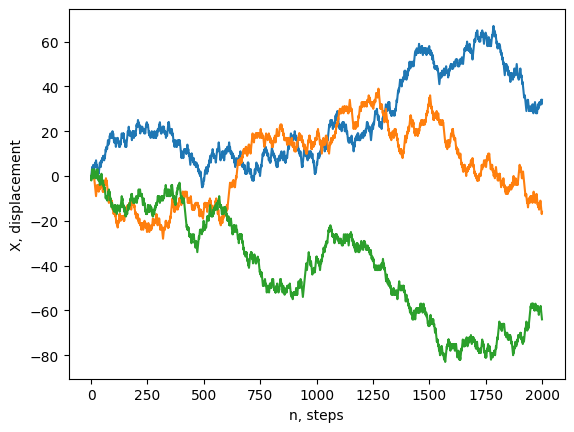

In [6]:
plt.plot(rw[:,:3]) # plot a few random walkers
plt.ylabel('X, displacement')
plt.xlabel('n, steps')

In [13]:
from scipy import stats
# Simulate 1D random walk
n_max = 1000
N     = 1000 
rw    = rw_1d(n_max, N)

def rw_plotter(t=1):
    
    fig, ax = plt.subplots(nrows=2)

    ### plot random walk
    ax[0].plot(rw)
    ax[0].axvline(x=t, color='black', linestyle='-', lw=2)
   
    ## Plot gaussian with width t**0.5
    ax[1].hist(rw[t, :], 
               color='orange', 
               density=True, 
               label=f'time={t}')
    
    x = np.linspace(rw.min(), rw.max(), 1000)
    y = stats.norm.pdf(x, 0, np.sqrt(t))
    ax[1].plot(x, y, 
               color='black', 
               lw=2, 
               label='normal')  

    ax[0].set_xlabel('X')
    ax[0].set_ylabel('t')
    ax[0].set_title('RW trajectries');
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('p(x)')
    
    ax[1].set_xlim([-100, 100])
    ax[1].legend()
    ax[1].set_title('$\sigma/t$='+f'{np.var(rw[t, :])/t:.3f}')
    fig.tight_layout()
    plt.show()

In [12]:
interactive( rw_plotter, t=(1, n_max-1) )

interactive(children=(IntSlider(value=1, description='t', max=999, min=1), Output()), _dom_classes=('widget-in…

**Question** 

Would sample mean get more accurate or less as a function of time?

### Mean square displacement (MSD) of a random walker

- After time n number of steps (or time t) how far has random walker moved from the origin?

$$R_n = \sum^{n-1}_{i=0}X_n$$

- We quantify this by computing **Mean Square Displacement (MSD)**. Note that the mean is computed over N number of simulated trajectories (ensemble average). Invoking central limit theorem, or simply realizing that off diagonal terms drop off we end up with the same result as in LLN.

$$
MSD(n)= \Big\langle \big ( R_n - R_0 \big)^2 \Big \rangle \sim n
$$

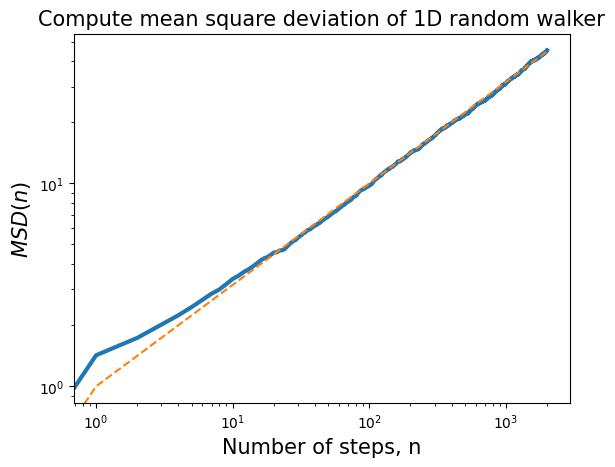

In [30]:
n, N = 2000, 1000
rw = rw_1d(n, N)

t = np.arange(n)

R2 = (rw[:, :] - rw[0, :])**2 # Notice we subtract initial time

msd =  np.mean(R2, axis=1)    # Notice we average over N

plt.loglog(t, np.sqrt(msd), lw=3) 

plt.loglog(t, np.sqrt(t), '--')

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)$',fontsize=15);

### 2D random walk

In [2]:
def rw_2d(n, N):
    '''2d random walk function:
    n: Number of steps
    N: Number of trajecotry
    returns np.array with shape (T, N)
    '''
    verteces = np.array([(1,  0),
                         (0,  1),
                         (-1, 0),
                         (0, -1)])
    
    rw       = verteces[np.random.choice([0,1,2,3], size=(n, N))]
    
    rw[0, :, :] = 0
    
    return rw.cumsum(axis=0)

In [3]:
traj = rw_2d(n=10000, N=1000)

In [4]:
traj.shape

(10000, 1000, 2)

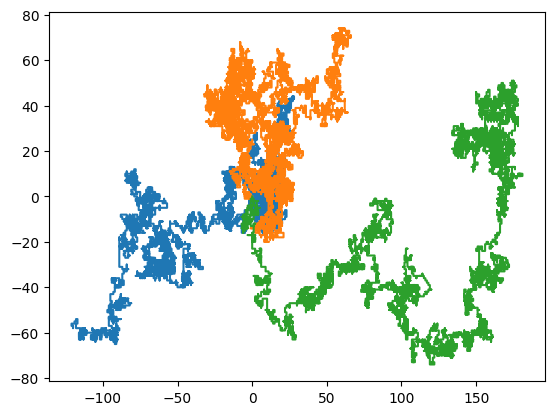

In [5]:
plt.plot(traj[:,:3, 0], traj[:,:3, 1]) # plot first three random walkers

### Compute RSD for 2D random walker

In [6]:
#Simulate 2D random walk
n, N = 10000, 1000
traj = rw_2d(n, N)

#Compute RSD 
dx = (traj[:, :, 0]- traj[0, :, 0]) 
dy = (traj[:, :, 1]- traj[0, :, 1]) 

R2     = np.mean(dx**2 + dy**2, axis = 1)   # notice that we are averaging over N walkers 

In [7]:
R2.shape

(10000,)

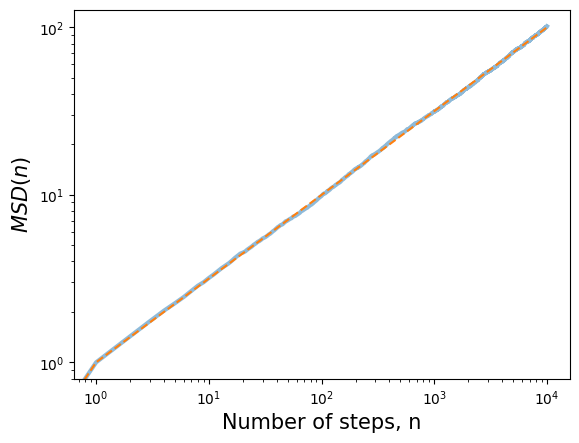

In [8]:
fig, ax  = plt.subplots()

t = np.arange(n) # time axis
ax.loglog(t, np.sqrt(R2), lw=3, alpha=0.5);
ax.loglog(t, np.sqrt(t), '--');

ax.set_xlabel('Number of steps, n',fontsize=15)
ax.set_ylabel(r'$MSD(n)$',fontsize=15);

```{admonition} Appendix A: Stitrling's approximation of N!
:class: tip, dropdown

**Stirling's approximation**

- This is the crude version of Stirling approximation that works out for $N\gg 1$

$$logN! \approx \sum log N_i = \int log N dN$$

$$\boxed{logN! \approx NlogN-N}$$

$$\boxed{N! \approx N^N e^{-N}}$$

- A more accurate version is:

$$\boxed{N! \approx N^N e^{-N} \sqrt{2\pi N}}$$

**Applying Stirling approximation to the Binomial**

$$N = N_1+N_2$$ 

$$\frac{N!}{N_1! \cdot N_2!} \approx \frac{N^N e^{-N}}{N_1^{N_1} e^{-N_1}\cdot N_2^{N_2} e^{-N_2}} =\frac{N^N } {N_1^{N_1} \cdot N_2^{N_2} }$$

$$log\frac{N!}{N_1! \cdot N_2!} \approx NlogN -N_1 log N_1 - N_2log N_2 = \\ = N \Big[ -\frac{N_1}{N} lo\frac {N_1}{N} - \frac{N_2}{N} log \frac{N_2}{N} \Big] = N[-p_1 log p_1 -p_2log p_2]$$

- The expression $S =  \sum_i -p_i log p_i$ will be identified with Entropy in later sections. 
```

```{admonition} Appendix B. Gaussian approximation to the Binomial Distribution in the large $N$ limit.
:class: tip, dropdown  

Binomial distribution for large values of $N$ has a sharply peaked distribution around its maximum (most likely) value $\bar{n}$. This motivates us to seek a continuous approximation by Taylor expanding probability distribution around its max value $\Delta n = n-\bar{n}$ and keeping up to quadratic terms.

$$P_N(n) = \frac{N!}{n! (N-n)!} p^n (1-p)^{(N-n)}$$

Thus from the onset we are aiming for a Gaussian distribution. The task then is to find coefficients and to then justify that third term of Taylor expansion is negligible compared to the second!

$$logP(n) = logP(\bar{n}) + \frac{1}{2}B_2\Delta n^2 + O(\delta n^3)$$

$$log P(n) = log N! - log n! - log(N-n)! + nlog(p) + (N-n)log(1-p)$$

We evaluate derivative of $logn!$ in the limit of $n\gg1$ as: 

$$\frac{d}{dn} log n! = \frac{log(n+1)! - log n!}{n+1-n} \approx log(n+1) \approx log(n)$$

- We could also arrive at the same result by using Stirling approximation $logN! \approx  NlogN -n$
- Taking first derivative of Taylor expansion to Binomial we find the peak of the distribution around which we are making expansion:

$$\frac{d}{dn}log P(n) \Big |_{n=\bar{n}} = - log n + log(n-n) + log(p)  -log(1-p)=0$$

$$log \Big( \frac{N-n}{n} \frac{p}{1-p}\Big)=0\,\, \rightarrow \,\, \bar{n} = Np$$

- We recall that $\bar{n} = Np$ is also mean of the binomial! 
- Having found the peak of distribution and knowing first derivative we now proceed to compute the second derivative:

$$B_2 = \frac{d^2}{d n^2} logP(n) \Big |_{n = \bar{n}} = \frac{d}{dn} log \Big( \frac{N-n}{n} \frac{p}{1-p}\Big) \\ = \Big( - \frac{1}{N-n}-\frac{1}{n} \Big) \Big |_{n = \bar{n}} = - \frac{1}{Npq}$$

- While first derivative gave us the mean of binomial we notice that second derivative produces the variance $\sigma^2 = Npq$
- Now all that remains to do is to plug  the coefficients into our approximated probability distribution and then normalize it. Why normalize? After all Binomial was already properly normalized.  But since we made approximation by leaving our some terms we have to re-normalize again!

$$P(n) \approx P(\bar{n}) e^{-(n-\bar{n})^2/ 2Npq}$$

- Normalizing gaussian distribution is done via the following table integral

$$\int^{+\infty}_{-\infty} e^{-ax^2} = \Big(\frac{\pi}{a} \Big)^{1/2}$$

$$\int P(\bar{n}) e^{-(n-\bar{n})^2/ 2Npq} dn  = P(\bar{n}) (2\pi Npq)^{1/2}=1$$

- At last we have the normalized approximation to Binomial which is a guassian distribution arond mean!

$$P(n) \approx \frac{1}{(2\pi Npq)^{1/2}} e^{-(n-\bar{n})^2/ 2Npq} = \frac{1}{(2\pi \sigma^2)^{1/2}}e^{(n-\mu)^2/2\sigma^2}$$
```


```{admonition} Appendix C. Deriving Poisson distribution from Binomial 
:class: tip, dropdown 

**Consider the limit of large $N$ and small $p$ such that $Np=const$**

- This is a situation of rare events like rains in forest or radioactive decay of uranium where each individual event has small chance of happening $p \rightarrow 0$  yet there are large number of samples $N\rightarrow \infty$ such that one has a constant average rate of events $\lambda = pN = const$
- In this limit distirbution is no longer well described by the gaussian as the shape of distribution is heavily skewed due to tiny values of p.

$$P_N(n) = \frac{N!}{n! (N-n)!} p^n (1-p)^{(N-n)}$$

- Writing factorial $N!/(N-n)!$ explicitely we realize that it is dominated $N^n$ and also $N-n \approx N$

$$P_N(n) = \frac{N(N-1)...(N-1+1))}{n!} p^n (1-p)^{(N-n)} \approx \frac{N^n}{n!} p^n (1-p)^{N}$$

- Next let us plug in $\lambda = pN = const$ and recall the definition of exponential $lim_{x\rightarrow \infty }(1-1/x)^x = e^{-x}$

$$P(n) = \frac{N^n}{n!} \Big( \frac{\lambda}{N} \Big)^n \Big( 1-\frac{\lambda}{N} \Big)^{N} = \frac{\lambda^n}{n!} \Big( 1-\frac{\lambda}{N} \Big)^{N} \approx \frac{\lambda^n}{n!} e^{-\lambda}$$
```

### Problems



####  Confined diffusion.
Simulate 2D random walk in a circular confinement. Re-write 2D random walk  code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. 
- Carry out simulations for different confinement sizes. 
- Make plots of simulated trajectories.

#### Return to the origin!

- Simulate random walk in 1D and 2D for a different number of steps $N=10, 10^2,10^3, 10^4, 10^5$
- Compute average number of returns to the origin $\langle n_{orig} \rangle$. That is number of times a random walker returns to the origin $0$ for 1D  or (0,0)$ for 2D . You may want to use some 1000 trajectories to obtain average. 
- Plot how $\langle n_{orig} \rangle$ depends on number of steps N for 1D and 2D walker.


####  Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### (Optional Problem) Continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 

## References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**
- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)